In [45]:
#TinderProjekt Lorenz Faber | FTI2
# als erstes müssen die Daten bereinigt und geordnet werden, da 0 werte enthalten sind
# und auch die aufsplittung in die verschiedenen Universitäten für einen Gesamteindruck sehr 
# schlecht geeignet sind

In [159]:

import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #wird für Tortendiagramm verwendet
df = pd.read_csv('Tinder Millennial Match Rate Dataset.csv')
df

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
0,292881,Mobile,Mobile respondents,Yes,797,0.207,Yes
1,292883,Mobile,Mobile respondents,No,1969,0.511,No
2,292885,Mobile,Mobile respondents,I don't use Tinder,1090,0.283,Yes
3,292887,Web,Web-based respondents,Yes,0,0.000,No
4,292889,Web,Web-based respondents,No,0,0.000,No
...,...,...,...,...,...,...,...
448,293777,University,Boston College,No,4,0.800,Yes
449,293779,University,Boston College,I don't use Tinder,1,0.200,No
450,293781,University,Boston University,Yes,2,0.333,Yes
451,293783,University,Boston University,No,3,0.500,No


In [160]:
df.describe()

,ID,Count,Percentage
count,453.000000,453.000000,453.000000
mean,293333.000000,22.373068,0.331141
std,261.828188,136.996075,0.316157
min,292881.000000,0.000000,0.000000
25%,293107.000000,0.000000,0.000000
50%,293333.000000,1.000000,0.250000
75%,293559.000000,4.000000,0.500000
max,293785.000000,1969.000000,1.000000


In [161]:
#der Durchschnitt bei Count ist 22, jedoch sind 75% der Werte ~4 heißt es gibt sehr viele die eine sehr niedrige Anzahl an matches haben.

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        453 non-null    int64  
 1   Segment Type              453 non-null    object 
 2   Segment Description       453 non-null    object 
 3   Answer                    453 non-null    object 
 4   Count                     453 non-null    int64  
 5   Percentage                453 non-null    float64
 6   It became a Relationship  453 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 24.9+ KB


In [163]:
dfYes = df[df['Answer'] == 'Yes'] #Filtern um einzelne Tabellen mit Yes, No, I don't use Tinder zu unterteilen.

In [164]:
dfYes

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
0,292881,Mobile,Mobile respondents,Yes,797,0.207,Yes
3,292887,Web,Web-based respondents,Yes,0,0.000,No
6,292893,Gender,Male respondents,Yes,472,0.213,Yes
9,292899,Gender,Female respondents,Yes,325,0.198,No
12,292905,University,Chapman University,Yes,13,0.206,No
...,...,...,...,...,...,...,...
438,293757,University,Penn State University,Yes,4,0.400,No
441,293763,University,Minnesota State University Mankato,Yes,1,1.000,No
444,293769,University,University of Florida,Yes,0,0.000,Yes
447,293775,University,Boston College,Yes,0,0.000,No


In [165]:
dfNo = df[df['Answer'] == 'No']

In [166]:
dfNo

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
1,292883,Mobile,Mobile respondents,No,1969,0.511,No
4,292889,Web,Web-based respondents,No,0,0.000,No
7,292895,Gender,Male respondents,No,1172,0.528,No
10,292901,Gender,Female respondents,No,797,0.487,Yes
13,292907,University,Chapman University,No,31,0.492,No
...,...,...,...,...,...,...,...
439,293759,University,Penn State University,No,5,0.500,No
442,293765,University,Minnesota State University Mankato,No,0,0.000,No
445,293771,University,University of Florida,No,1,1.000,No
448,293777,University,Boston College,No,4,0.800,Yes


In [167]:
dfUnsure = pd.concat([df, dfYes, dfNo]).drop_duplicates(keep=False)

In [168]:
dfUnsure

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
2,292885,Mobile,Mobile respondents,I don't use Tinder,1090,0.283,Yes
5,292891,Web,Web-based respondents,I don't use Tinder,0,0.000,No
8,292897,Gender,Male respondents,I don't use Tinder,574,0.259,No
11,292903,Gender,Female respondents,I don't use Tinder,516,0.315,No
14,292909,University,Chapman University,I don't use Tinder,19,0.302,Yes
...,...,...,...,...,...,...,...
440,293761,University,Penn State University,I don't use Tinder,1,0.100,Yes
443,293767,University,Minnesota State University Mankato,I don't use Tinder,0,0.000,No
446,293773,University,University of Florida,I don't use Tinder,0,0.000,No
449,293779,University,Boston College,I don't use Tinder,1,0.200,No


In [169]:
Total_Count = [dfYes['Count'].sum(), dfNo['Count'].sum(), dfUnsure['Count'].sum()]
print(Total_Count)

[2128, 5227, 2780]


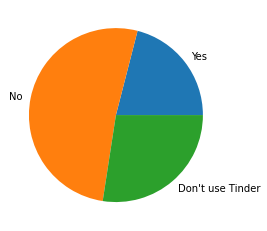

In [170]:
mylabels = ["Yes" , "No", "Don't use Tinder"]

plt.pie(Total_Count, labels = mylabels)
plt.show()

In [ ]:
#Nun wird nur Yes und No zusammengefügt, da nur die Korrelation zwischen ob man sich jemals mit einem über Tinder getroffen hat & ob man in einer Beziehung ist betrachtet wird, 
# und die leute die überhaupt kein tinder nutzen erstmal außenvor gelassen werden.

In [209]:
frames = [dfYes, dfNo]

In [210]:
result = pd.concat(frames)

In [214]:
result

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
0,292881,Mobile,Mobile respondents,Yes,797,0.207,Yes
3,292887,Web,Web-based respondents,Yes,0,0.000,No
6,292893,Gender,Male respondents,Yes,472,0.213,Yes
9,292899,Gender,Female respondents,Yes,325,0.198,No
12,292905,University,Chapman University,Yes,13,0.206,No
...,...,...,...,...,...,...,...
439,293759,University,Penn State University,No,5,0.500,No
442,293765,University,Minnesota State University Mankato,No,0,0.000,No
445,293771,University,University of Florida,No,1,1.000,No
448,293777,University,Boston College,No,4,0.800,Yes


In [215]:
dfMobile = result[result['Segment Type'] == 'Mobile']

In [216]:
dfMobile

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
0,292881,Mobile,Mobile respondents,Yes,797,0.207,Yes
1,292883,Mobile,Mobile respondents,No,1969,0.511,No


In [217]:
dfWeb = result[result['Segment Type'] == 'Web']
dfWeb

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
3,292887,Web,Web-based respondents,Yes,0,0.0,No
4,292889,Web,Web-based respondents,No,0,0.0,No


In [226]:
dfUniversity = result[result['Segment Type'] == 'University'] #filtern nur nach Universitäten
dfUniversity

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
12,292905,University,Chapman University,Yes,13,0.206,No
15,292911,University,Cornell University,Yes,47,0.244,No
18,292917,University,Duke University,Yes,0,0.000,No
21,292923,University,George Washington University,Yes,1,0.250,No
24,292929,University,Georgetown University,Yes,2,0.500,Yes
...,...,...,...,...,...,...,...
439,293759,University,Penn State University,No,5,0.500,No
442,293765,University,Minnesota State University Mankato,No,0,0.000,No
445,293771,University,University of Florida,No,1,1.000,No
448,293777,University,Boston College,No,4,0.800,Yes


In [227]:
#alle einheitlichen Werte zu den Spalten anzeigen
cat_col = ['Segment Type', 'Segment Description', 'Answer', 'It became a Relationship']
for col in cat_col:
    print('Unique values in "{}" column count: {}'.format(col, df[col].nunique()))
    print(df[col].unique())
    print('-'*30)

Unique values in "Segment Type" column count: 4
['Mobile' 'Web' 'Gender' 'University']
------------------------------
Unique values in "Segment Description" column count: 151
['Mobile respondents' 'Web-based respondents' 'Male respondents'
 'Female respondents' 'Chapman University' 'Cornell University'
 'Duke University' 'George Washington University' 'Georgetown University'
 'Harvard University' 'Indiana University' 'Johns Hopkins University'
 'Northwestern University' 'Ohio State University' 'Princeton University'
 'San Diego State University' 'Santa Clara University'
 'Southern Methodist University' 'Stanford University' 'Tulane University'
 'University of Pennsylvania' 'University of Wisconsin-Madison'
 'University of Alabama' 'University of California, Berkeley'
 'University of California, Davis' 'University of California, Los Angeles'
 'University of California, Santa Barbara'
 'University of Colorado Boulder' 'University of Miami'
 'University of Michigan' 'University of Oregon'

In [228]:
#Segment Type sagt aus, ob Tinder über die App(mobil), über das Web, oder über das Universätetenportal(Tinder U) genutzt wird, was man mit Gender über die Geschlechter aussagt, kann ich nicht wirklich deuten

#Segment Description zeigt die verschiedenen Universitäten auf

#Answer sagt ob die Person jemals jemanden getroffen hat mit Tinder oder ob sie die app nicht verwenden

#It became a Relationship sagt aus, ob eine Beziehung entstand.

#Tinder U > https://www.help.tinder.com/hc/de/articles/360015516052-Was-ist-Tinder-U-#:~:text=Tinder%20U%20ist%20ein%20neues,Kein%20Interesse%20zeigst.&text=Melde%20dich%20bei%20Tinder%20an,du%20auf%20dem%20Campus%20bist. 

In [229]:
# als nächstes wird sich nur auf die Universitäten, die also Tinder U verwenden, konzentriert

In [265]:
dfUniversity

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
12,292905,University,Chapman University,Yes,13,0.206,No
15,292911,University,Cornell University,Yes,47,0.244,No
18,292917,University,Duke University,Yes,0,0.000,No
21,292923,University,George Washington University,Yes,1,0.250,No
24,292929,University,Georgetown University,Yes,2,0.500,Yes
...,...,...,...,...,...,...,...
439,293759,University,Penn State University,No,5,0.500,No
442,293765,University,Minnesota State University Mankato,No,0,0.000,No
445,293771,University,University of Florida,No,1,1.000,No
448,293777,University,Boston College,No,4,0.800,Yes


In [266]:
dfUniversitybool = dfUniversity

In [267]:
dfUniversitybool

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
12,292905,University,Chapman University,Yes,13,0.206,No
15,292911,University,Cornell University,Yes,47,0.244,No
18,292917,University,Duke University,Yes,0,0.000,No
21,292923,University,George Washington University,Yes,1,0.250,No
24,292929,University,Georgetown University,Yes,2,0.500,Yes
...,...,...,...,...,...,...,...
439,293759,University,Penn State University,No,5,0.500,No
442,293765,University,Minnesota State University Mankato,No,0,0.000,No
445,293771,University,University of Florida,No,1,1.000,No
448,293777,University,Boston College,No,4,0.800,Yes


In [309]:
# da it became a Relationship nur Yes oder No enthält, macht es Sinn diese Werte in ein boolean umzuwandeln:

dict = {'Yes' :1, 'No' :0} #Übersetzung was soll 1 was 0 sein

dfUniversitybool['It became a Relationship'] = dfUniversitybool['It became a Relationship'].map(dict) 
dfUniversitybool['It became a Relationship'] = dfUniversitybool['It became a Relationship'].astype(bool) # datentyp zu bool ändern


<ipython-input-309-5043dafcbe61>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUniversitybool['It became a Relationship'] = dfUniversitybool['It became a Relationship'].map(dict)
<ipython-input-309-5043dafcbe61>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUniversitybool['It became a Relationship'] = dfUniversitybool['It became a Relationship'].astype(bool) # datentyp zu bool ändern


In [307]:
dfUniversitybool #result zeigt, dass It became a Relationship geändert wurde.

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
12,292905,University,Chapman University,Yes,13,0.206,True
15,292911,University,Cornell University,Yes,47,0.244,True
18,292917,University,Duke University,Yes,0,0.000,True
21,292923,University,George Washington University,Yes,1,0.250,True
24,292929,University,Georgetown University,Yes,2,0.500,True
...,...,...,...,...,...,...,...
439,293759,University,Penn State University,No,5,0.500,True
442,293765,University,Minnesota State University Mankato,No,0,0.000,True
445,293771,University,University of Florida,No,1,1.000,True
448,293777,University,Boston College,No,4,0.800,True


In [270]:
dfUniversitybool.sort_values('Segment Description') # sortieren nach Namen der Uni

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
355,293591,University,Appalachian State University,No,53,0.461,False
354,293589,University,Appalachian State University,Yes,16,0.139,False
268,293417,University,Arizona State University,No,1,0.500,True
267,293415,University,Arizona State University,Yes,0,0.000,False
406,293693,University,Arkansas State University,No,1,1.000,True
...,...,...,...,...,...,...,...
373,293627,University,Whatsgoodly University,No,1,1.000,False
181,293243,University,Williams College,No,0,0.000,False
180,293241,University,Williams College,Yes,0,0.000,False
139,293159,University,Yale University,No,0,0.000,False


In [271]:
from sklearn.model_selection import train_test_split

In [272]:
y = dfUniversitybool['It became a Relationship']

In [273]:
X = dfUniversitybool['Count']

In [274]:
y

12     False
15     False
18     False
21     False
24      True
       ...  
439    False
442    False
445    False
448     True
451    False
Name: It became a Relationship, Length: 294, dtype: bool

In [275]:
X

12     13
15     47
18      0
21      1
24      2
       ..
439     5
442     0
445     1
448     4
451     3
Name: Count, Length: 294, dtype: int64

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [277]:
X_train

228    1
57     3
42     1
348    0
216    2
      ..
136    4
225    7
330    0
382    0
318    0
Name: Count, Length: 220, dtype: int64

In [278]:
X_test

111     0
39      6
450     2
418     0
355    53
       ..
231     2
69     25
313     3
243     1
421     1
Name: Count, Length: 74, dtype: int64

In [279]:
X.describe()

count    294.000000
mean       6.200680
std       13.406376
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       95.000000
Name: Count, dtype: float64

In [280]:
from sklearn.neighbors import KNeighborsClassifier

In [281]:
knn = KNeighborsClassifier(n_neighbors=10)

In [282]:
X=dfUniversitybool['Count'].to_frame()

In [290]:
y_train

228    False
57     False
42      True
348    False
216     True
       ...  
136     True
225    False
330    False
382    False
318     True
Name: It became a Relationship, Length: 220, dtype: bool

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [292]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [293]:
y_predtrain = knn.predict(X_train)

In [310]:
y_predtrain

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [298]:
abs(y_predtrain-y_train).sum() /len(y_train) 

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [295]:
dfF1 = df[df['Segment Description']=='Female respondents']

In [87]:
dfF2 = df[df['Segment Description']=='Male respondents']

In [88]:
frames = [dfF1, dfF2]

In [89]:
result = pd.concat(frames)

In [90]:
result

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
9,292899,Gender,Female respondents,Yes,325,0.198,No
10,292901,Gender,Female respondents,No,797,0.487,Yes
11,292903,Gender,Female respondents,I don't use Tinder,516,0.315,No
6,292893,Gender,Male respondents,Yes,472,0.213,Yes
7,292895,Gender,Male respondents,No,1172,0.528,No
8,292897,Gender,Male respondents,I don't use Tinder,574,0.259,No


In [91]:
resultYes = result[result['Answer']=='Yes']

In [92]:
resultYes

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
9,292899,Gender,Female respondents,Yes,325,0.198,No
6,292893,Gender,Male respondents,Yes,472,0.213,Yes


In [93]:
resultNo = result[result['Answer']=='No']

In [94]:
resultNo

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
10,292901,Gender,Female respondents,No,797,0.487,Yes
7,292895,Gender,Male respondents,No,1172,0.528,No


In [12]:
resultdontUse = result[result['Answer']=="I don't use Tinder"]

In [49]:
resultdontUse

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
11,292903,Gender,Female respondents,I don't use Tinder,516,0.315,No
8,292897,Gender,Male respondents,I don't use Tinder,574,0.259,No
